Initial data shape: (7043, 33)

Data shape after cleaning and renaming: (7043, 20)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 

/tmp/ipython-input-590618581.py:70: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


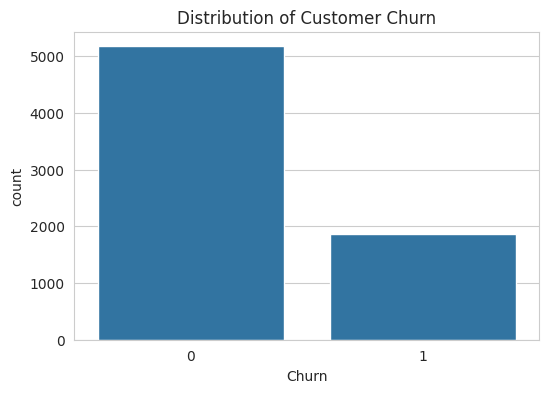

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


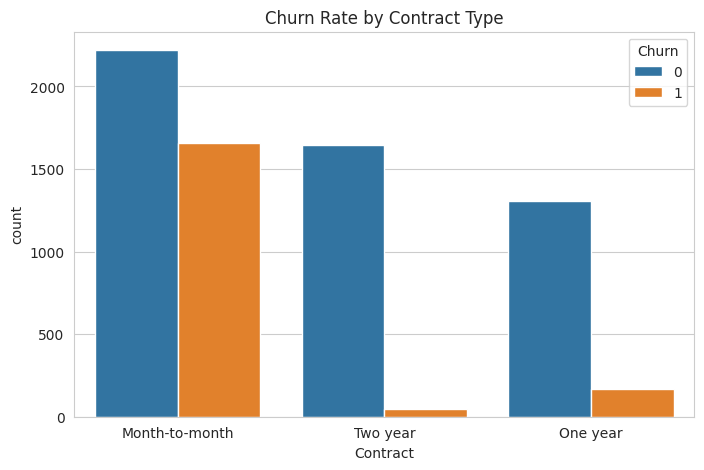

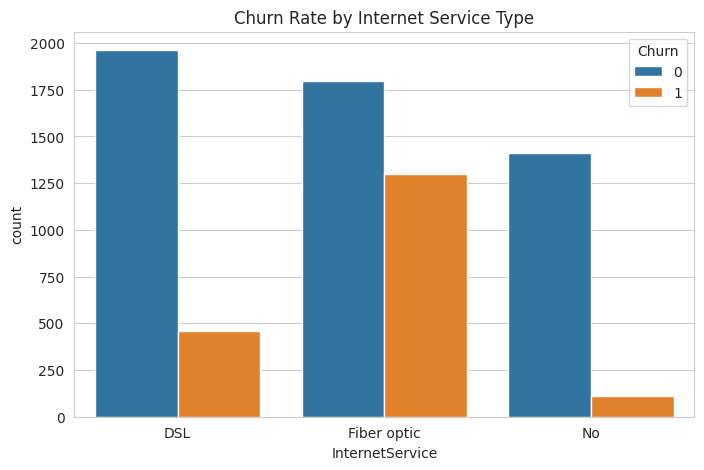

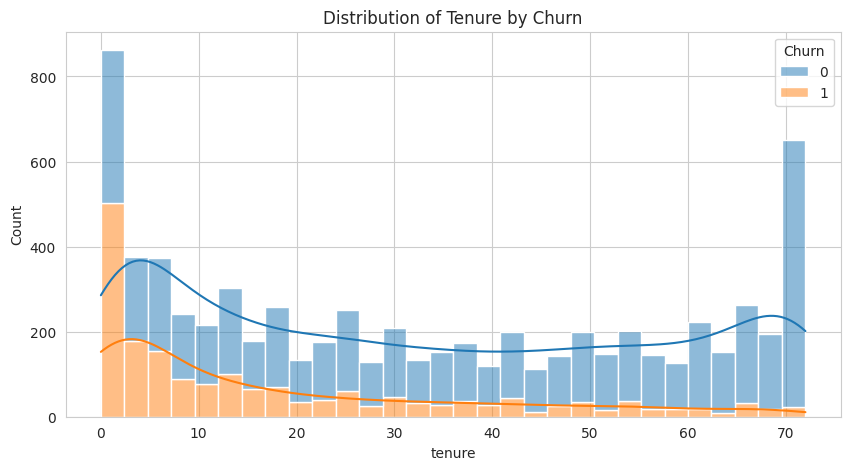


Numerical Features: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Shape of training data before SMOTE: (5634, 30)
Shape of training data after SMOTE: (8278, 30)
Churn distribution in resampled training data:
 Churn
0    4139
1    4139
Name: count, dtype: int64

--- Tuning Logistic Regression ---
Fitting 5 folds for each of 3 candidates, totalling 15 fits

--- Tuning KNN ---
Fitting 5 folds for each of 3 candidates, totalling 15 fits

--- Tuning SVM ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits

--- Tuning Random Forest ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits

--- Tuning XGBoost ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:28:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)




--- FINAL MODEL EVALUATION ---

--- Logistic Regression ---
Best Parameters: {'C': 10}
Test Set AUC: 0.8468
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.77      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.76      1409



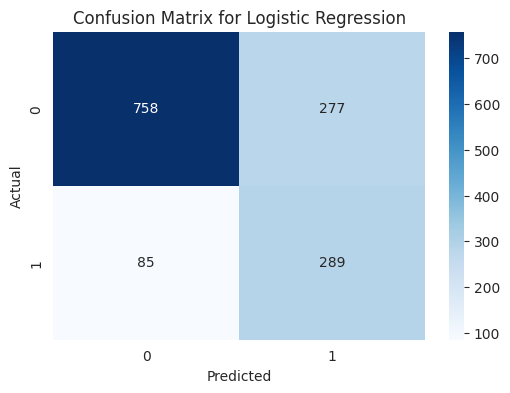


--- KNN ---
Best Parameters: {'n_neighbors': 5}
Test Set AUC: 0.7760
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.69      0.78      1035
           1       0.47      0.75      0.58       374

    accuracy                           0.71      1409
   macro avg       0.68      0.72      0.68      1409
weighted avg       0.77      0.71      0.72      1409



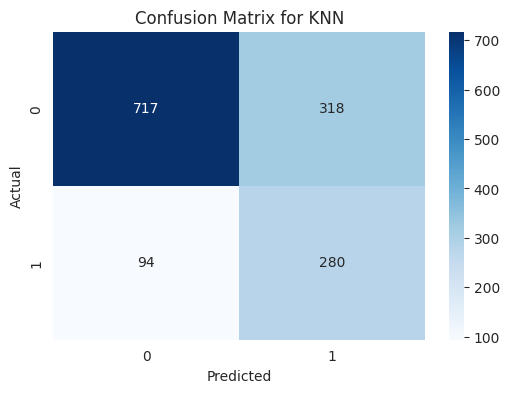


--- SVM ---
Best Parameters: {'C': 1, 'gamma': 'scale'}
Test Set AUC: 0.8388
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1035
           1       0.54      0.75      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



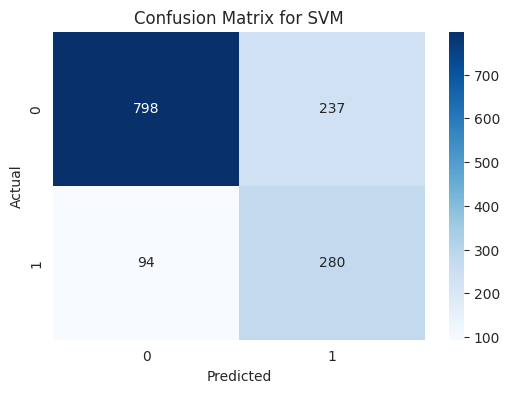


--- Random Forest ---
Best Parameters: {'max_depth': 20, 'n_estimators': 200}
Test Set AUC: 0.8379
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1035
           1       0.59      0.62      0.60       374

    accuracy                           0.78      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.78      0.79      1409



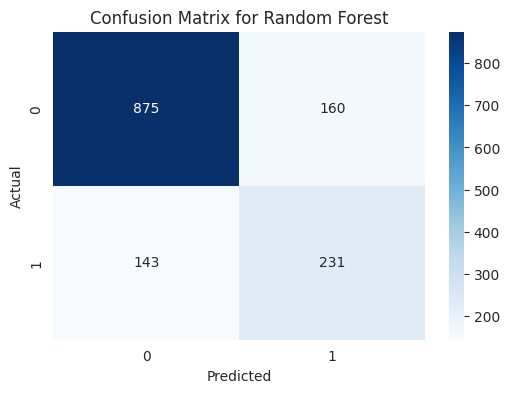


--- XGBoost ---
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Test Set AUC: 0.8452
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1035
           1       0.60      0.63      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.79      0.79      0.79      1409



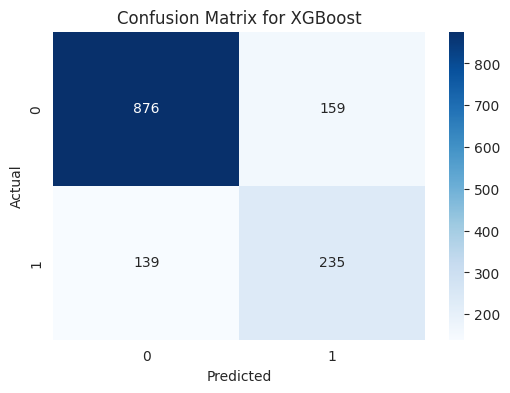


--- Top 10 Feature Importances from XGBoost ---
                           feature  importance
25               Contract_Two year    0.228130
24               Contract_One year    0.125175
10     InternetService_Fiber optic    0.107417
6                   Dependents_Yes    0.076474
11              InternetService_No    0.065135
28  PaymentMethod_Electronic check    0.055681
13              OnlineSecurity_Yes    0.038414
23             StreamingMovies_Yes    0.036648
19                 TechSupport_Yes    0.027950
26            PaperlessBilling_Yes    0.026140


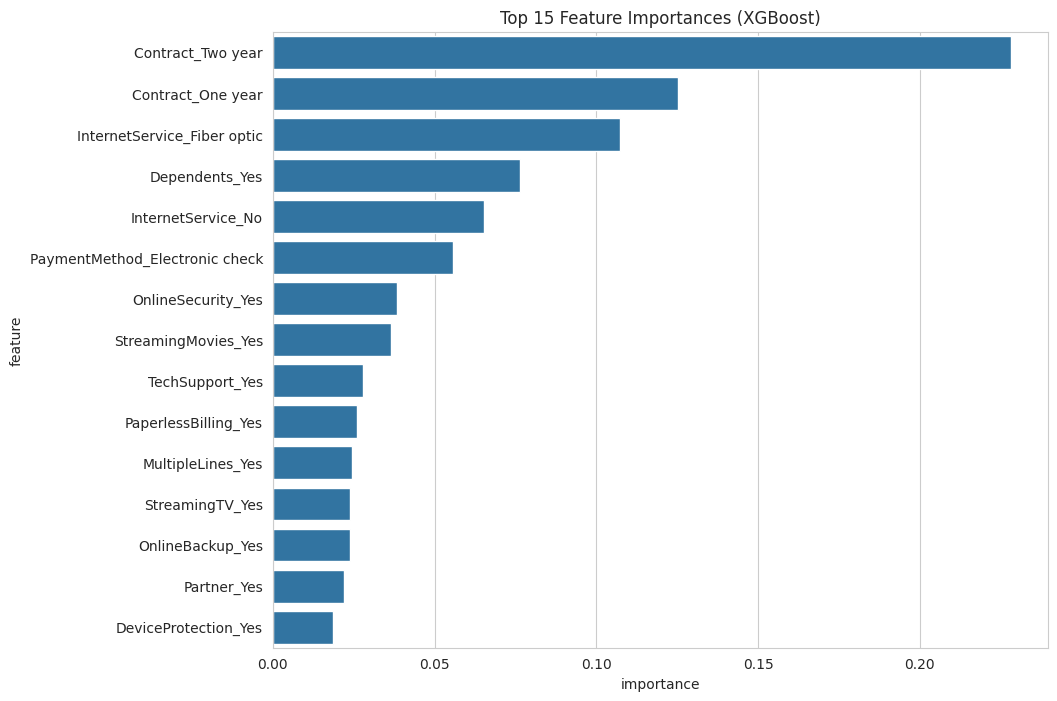

In [ ]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Set plot style
sns.set_style('whitegrid')

# 2. LOAD DATA
# Using the user-provided dataset 'Telco_customer_churn(Telco_Churn).csv'
try:
    df = pd.read_csv('Telco_customer_churn(Telco_Churn).csv')
except FileNotFoundError:
    print("Dataset file not found. Please ensure 'Telco_customer_churn(Telco_Churn).csv' is in the correct directory.")
    exit()

# 3. DATA CLEANING AND PREPROCESSING
print("Initial data shape:", df.shape)

# Drop unnecessary columns from the new dataset
columns_to_drop = [
    'CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
    'Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Score',
    'CLTV', 'Churn Reason'
]
df = df.drop(columns=columns_to_drop)

# Rename columns to match the original script's expectations and remove spaces
df = df.rename(columns={
    'Gender': 'gender',
    'Senior Citizen': 'SeniorCitizen',
    'Tenure Months': 'tenure',
    'Phone Service': 'PhoneService',
    'Multiple Lines': 'MultipleLines',
    'Internet Service': 'InternetService',
    'Online Security': 'OnlineSecurity',
    'Online Backup': 'OnlineBackup',
    'Device Protection': 'DeviceProtection',
    'Tech Support': 'TechSupport',
    'Streaming TV': 'StreamingTV',
    'Streaming Movies': 'StreamingMovies',
    'Paperless Billing': 'PaperlessBilling',
    'Payment Method': 'PaymentMethod',
    'Monthly Charges': 'MonthlyCharges',
    'Total Charges': 'TotalCharges',
    'Churn Value': 'Churn'
})


# Handle missing values in TotalCharges
# The column might contain empty strings which need to be handled.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Impute the resulting NaNs with 0, as these are new customers with no charges yet.
df['TotalCharges'].fillna(0, inplace=True)

# Note: The 'SeniorCitizen' and 'Churn' columns in this new dataset are already
# in the desired format ('Yes'/'No' for SeniorCitizen and 1/0 for Churn),
# so the mapping steps from the previous script are no longer needed.

print("\nData shape after cleaning and renaming:", df.shape)
print("\nData Info:")
df.info()


# 4. EXPLORATORY DATA ANALYSIS (EDA)
# Note: In a script, plots will be generated and shown sequentially.
# In a Jupyter Notebook, they would appear inline.

# Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
plt.show()
print(df['Churn'].value_counts(normalize=True))

# Churn by Contract Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.show()

# Churn by Internet Service
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn Rate by Internet Service Type')
plt.show()

# Distribution of Tenure
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, kde=True)
plt.title('Distribution of Tenure by Churn')
plt.show()

# 5. FEATURE ENGINEERING & PREPARATION FOR MODELING

# Define features
X = df.drop('Churn', axis=1)
y = df['Churn']

# Identify categorical and numerical features
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print("\nNumerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

# Create preprocessing pipelines for numerical and categorical features
# Numerical features will be scaled
numerical_transformer = StandardScaler()

# Categorical features will be one-hot encoded
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

# Create a preprocessor object using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

# 6. SPLIT DATA AND HANDLE CLASS IMBALANCE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print("\nShape of training data before SMOTE:", X_train_processed.shape)
print("Shape of training data after SMOTE:", X_train_resampled.shape)
print("Churn distribution in resampled training data:\n", y_train_resampled.value_counts())


# 7. MODEL TRAINING AND HYPERPARAMETER TUNING

# Define models and their hyperparameter grids
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

params = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'SVM': {'C': [0.1, 1], 'gamma': ['scale', 'auto']},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20, None]},
    'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
}

# Store results
results = {}
best_models = {}

# Loop through models, perform GridSearchCV, and evaluate
for model_name, model in models.items():
    print(f"\n--- Tuning {model_name} ---")

    grid_search = GridSearchCV(model, params[model_name], cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

    # We train on the resampled (SMOTE) data
    grid_search.fit(X_train_resampled, y_train_resampled)

    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    # Make predictions on the original (unseen) test set
    y_pred = best_model.predict(X_test_processed)
    y_pred_proba = best_model.predict_proba(X_test_processed)[:, 1]

    # Store metrics
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'auc': roc_auc_score(y_test, y_pred_proba),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# 8. MODEL EVALUATION AND COMPARISON
print("\n\n--- FINAL MODEL EVALUATION ---")
for model_name, result in results.items():
    print(f"\n--- {model_name} ---")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Test Set AUC: {result['auc']:.4f}")
    print("Classification Report:")
    print(result['classification_report'])

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 9. FEATURE IMPORTANCE FROM THE BEST MODEL (XGBoost)
# Get the best XGBoost model from our training loop
best_xgb_model = best_models['XGBoost']

# Get feature names after one-hot encoding
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, cat_feature_names])

# Create a DataFrame for feature importances
importances = pd.DataFrame({
    'feature': all_feature_names,
    'importance': best_xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n--- Top 10 Feature Importances from XGBoost ---")
print(importances.head(10))

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importances.head(15))
plt.title('Top 15 Feature Importances (XGBoost)')
plt.show()
